# Notes

- It is clear that this will require some math knowledge and Concepts of signal processing.



## Signal processing

Intro video: https://youtu.be/jnxqHcObNK4?si=9KShgg3t2WxjHjZG  (**Foundation for wavelet**)

- Many times actual data/patterns are hidden behing thee Noise of a time series
- Hence Different types of **wavelet transforms** are used to pull out the features/data from the noisy raw.
    - One of the time-frequency features extracted in our work is Continuous Wavelet Transform (CWT) to decompose the phasic GSR signal into wavelets.

---
#### Frequency and Time

Frequency can be sub-categorised as high and low => which in case of GSR readings, map to *phasic* and *tonic* components of GSR-time series.

- *Phasic Component*:
    - It is related to Fast changes of the data.
    - The phasic component is responsible for *skin conductance responses (SCRs)*, which are relatively fast variations in the GSR signal (order of seconds).
    - SCRs are the fast changes or peaks that can be seen.
        - SCRs can be divided into two:
            1.  event-related SCR (ER-SCR)
            2.  non-specific SCR (NS-SCR).
        - ER-SCRs can be created in reaction to a specific event and they are the most frequent measure for relating changes in emotional arousal to particular stimuli in researches.
        - *The apparent variation in ER-SCRs is SCR peaks that happen between 1 and 5 seconds after emotional stimuli begin.*
- *Tonic Component*:
    - The tonic component in a GSR signal is typically considered to be the background level of activity on top of which fast GSR responses emerge.
    - Individuals' baseline tonic levels vary greatly, often ranging from 2µS to 20µS.


---

#### Fourier Transform

- With the help of FT we can destructure or we can say, pull out the underlying frequencies of the Time series.
- But it is seen that after applying the FT, **All the Data related to Time is loss**(Better described in the video).
- **Wavelet Transforms** are the intermediate things which preserves some features of time as well as frequency domain. 


#### Wavelets
- Wavelets are a waveform with limited time duration and finite energy(finite Area)
- 

---
### Continous Wavelet Transform for Time series Data

- Continous Wavelet Transform (CTW) is a form of scalogram which can be **served as an image to Deep Neural Network** for signal classification.
    - *Scalogram*: 
        - A scalogram is a time-frequency representation of a signal that is obtained by taking the absolute value of the continuous wavelet transform (CWT) of the signal.
        - It is a heatmap like plot of CWT coffecients, with time on X-axis and frequency on Y-axis.

In [20]:
# Example continous wavelet tarnsform
from scipy.signal import cwt,morlet
import numpy as np
import matplotlib.pyplot as plt

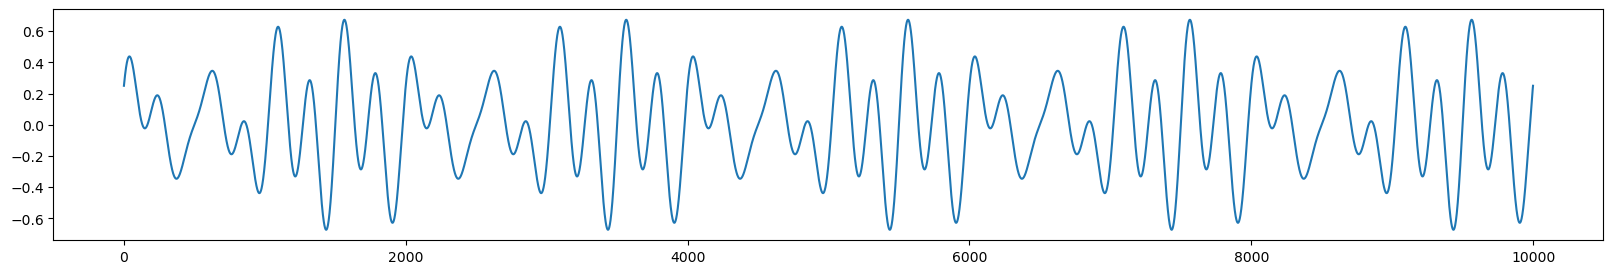

In [24]:
time_axis = np.linspace(0,2,10000)
signal_data = (np.sin(20*np.pi*time_axis) + np.sin(40*np.pi*time_axis) + np.cos(45 * np.pi * time_axis))/4   # generating a random signal.


widths = np.arange(1,31)  # this is similar to range
plt.figure(figsize=(20,3))
plt.plot(signal_data)

In [29]:
# Now doing continous wavelet transform

coeffs= cwt(signal_data, morlet , widths)
coeffs

array([[-1.27363861e-03-0.11325947j,  2.22084891e-02-0.02284597j,
        -8.79555272e-05-0.00526898j, ..., -6.12911754e-04-0.0058796j ,
         4.04559892e-05-0.00591714j,  2.40815519e-02+0.01301136j],
       [-6.29096563e-03-0.19497721j,  1.10088179e-01-0.09294039j,
         5.29168239e-02+0.00925584j, ...,  1.19800294e-03-0.02540032j,
         5.69288658e-02-0.03383622j,  1.22878587e-01+0.07467786j],
       [-6.79919912e-03-0.17956935j,  1.37334401e-01-0.07536906j,
         8.48971545e-02+0.0633416j , ..., -2.05221215e-02-0.06480289j,
         8.77085834e-02-0.07863727j,  1.51013992e-01+0.06537395j],
       ...,
       [-4.17430992e-03-0.1564898j ,  1.47544234e-01-0.05181368j,
         9.41917753e-02+0.12421958j, ..., -9.91273391e-02-0.12699274j,
         9.10159170e-02-0.13390914j,  1.55805232e-01+0.0458009j ],
       [-4.17426136e-03-0.15649363j,  1.47555521e-01-0.05182756j,
         9.42358786e-02+0.12424659j, ..., -9.91671164e-02-0.12709172j,
         9.10590768e-02-0.13393734j